In [15]:
import numpy as np
import os

outdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/lmcorrected/gtex-ms/tejaas/mafnull_sb0.01/chr7"
outfile = os.path.join(outdir, "rr.txt")

outdir_random = "/scratch/sbanerj/trans-eqtl/dev-pipeline/lmcorrected/gtex-ms/tejaas_rand/mafnull_sb0.01/chr7"
outfile_random = os.path.join(outdir_random, "rr.txt")

#outdir_peer = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex-ms_35peer/tejaas/permnull_sb0.01/chr7"
#outfiles_peer = glob.glob( outdir_peer + "/chunk*_rr.txt")

In [16]:
def read_tejaas_rr_pvals(filename):
    pvals = list()
    with open(filename, "r") as mfile:
        next(mfile)
        for line in mfile:
            pvals.append(float(line.split()[5]))
    pvals = np.array(pvals)
    return pvals

pvals = read_tejaas_rr_pvals(outfile)
pvals_random = read_tejaas_rr_pvals(outfile_random)
#pvals_peer = read_tejaas_rr_pvals(outfiles_peer)

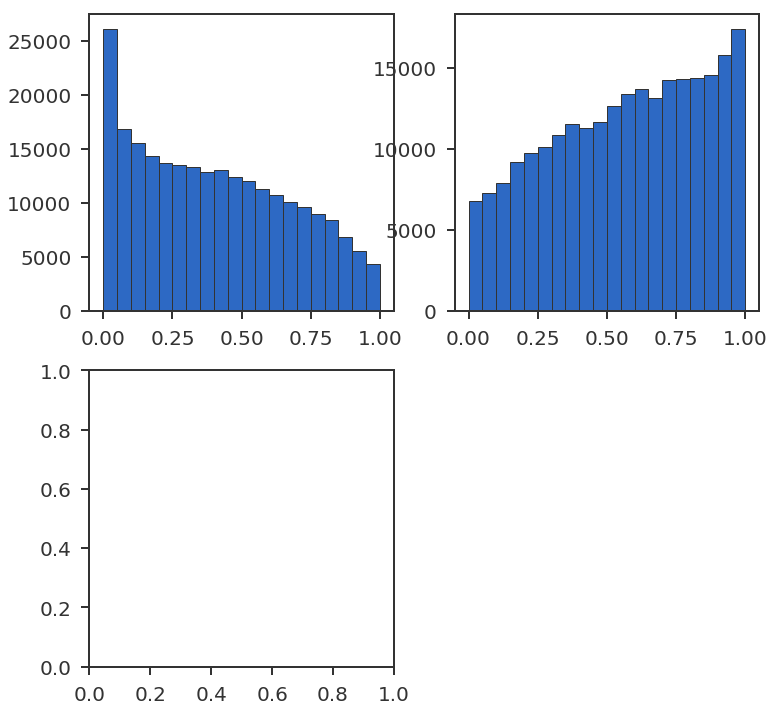

In [17]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'system')

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.hist(pvals_random)
ax2.hist(pvals)
#ax3.hist(pvals_peer)
plt.show()

In [9]:
pvals.shape

(239831,)

In [10]:
pvals_random.shape

(239831,)

In [18]:
np.where(pvals < 0.0001)

(array([  1629,   1693,   3778,   3781,   4129,   4143,  11140,  11141,
         19993,  22188,  41280,  41281,  42083,  66878,  66879,  66883,
         66885,  66897,  66899,  66904,  66920,  78906,  82602, 100741,
        107375, 135458, 154059, 185816, 187131, 200786, 205390, 213864,
        214879, 214880, 214971, 214972, 214977, 214995, 215005, 215011,
        215017, 215115, 215122, 221794, 224120, 225541, 225544, 225545,
        225551, 231754, 238005, 238006]),)

In [19]:
np.where(pvals_random < 0.0001)

(array([  1634,   1693,   1799,   3066,   3067,   3108,   5072,   5772,
          9502,   9682,   9709,  10114,  10171,  11140,  11487,  11837,
         12043,  12545,  12824,  12825,  12841,  12852,  12855,  12857,
         14102,  14111,  14112,  14146,  14182,  14183,  14196,  14204,
         14252,  14263,  14286,  14315,  14317,  14332,  14339,  14341,
         14349,  14351,  14457,  14458,  15058,  15911,  17049,  17055,
         17056,  17060,  17063,  17065,  17067,  17068,  17069,  17070,
         17071,  17073,  17074,  17076,  17077,  17271,  17462,  17469,
         17472,  17516,  17522,  17525,  18479,  20073,  21879,  21919,
         21920,  27051,  27349,  28104,  28705,  28706,  30480,  30622,
         32190,  32204,  32206,  32754,  32900,  34895,  36381,  36384,
         37596,  38950,  39010,  39045,  39060,  39073,  39083,  39085,
         39091,  39237,  39248,  39249,  39264,  39267,  39283,  39291,
         39298,  39310,  39312,  39313,  41280,  41281,  41282, 

In [14]:
pvals_random[1629]

4.15657e-05